Movimiento parabólico ideal  GENERAL

In [1]:
# librerias necesarias
import numpy as np #numérica
import matplotlib.pyplot as plt #gráficos
from EULER import * #libreria propia con el método de euler (puede usar runge kutta o la que mejor maneje)

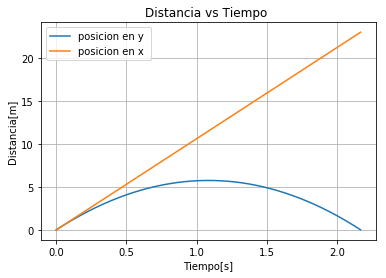

Xmaximo teorico =  22.959183673469386 ,x_numerico =  22.959183673469383


In [3]:
#parámetros de simulación
g = 9.8
angulo = 45*np.pi/180
vo = 15*np.sin(angulo) #velocidad inicial en el eje y 
yo = 0 #altura inicial
tmax = 2*vo/g#tiempo final
tmin = 0#tiempo inicial
h = 0.001 #tamaño del paso
f_xy = '(-9.8)' #función aceleración para modelo lineal de arrastre
evaluar_1 = euler_mejorado() ## algoritmo de euler mejorado 
x_y_1 = np.array(evaluar_1.euler_2do_m(f_xy,tmax,tmin,h,yo,vo))
t1 = x_y_1[0,:]
y1 = x_y_1[1,:]
v1 = x_y_1[2,:]
x1 = 15*np.cos(angulo)*t1
plt.figure(1)
yl, = plt.plot(t1,y1, label ='posicion en y ')
xl, = plt.plot(t1,x1,label = 'posicion en x')

plt.ylabel('Distancia[m]')
plt.xlabel('Tiempo[s]')
plt.title('Distancia vs Tiempo ')
plt.grid('on')
plt.legend(handles=[yl,xl])
plt.show()
xmax = ((15**2)/g)
print('Xmaximo teorico = ', xmax, ',x_numerico = ',x1[-1])

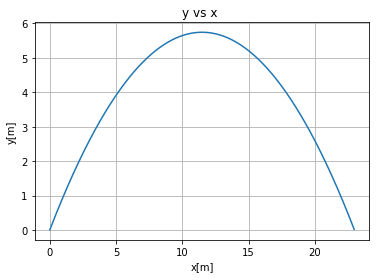

In [5]:
#%%
plt.figure(2)
xy, = plt.plot(x1,y1, label =' ')
plt.ylabel('y[m]')
plt.xlabel('x[m]')
plt.title('y vs x ')
plt.grid('on')
plt.show()

Se busca analizar el $X$ vs $\theta$, la ecuación cuadrática que modela este comportamiento es:
\begin{equation}
x^{2}-k\sin{(\theta)}\cos{(\theta)}-k\cos^{2}{(\theta)}h=0
\end{equation}
Con $k=\frac{2v^{2}}{g}$
\begin{equation*}
\end{equation*}
Las soluciones respectivas son:
\begin{equation}
x_{1}=\frac{1}{2}\cos{(\theta)}\left(k\sin{(\theta)}-\sqrt{k}\sqrt{4h+k\sin^{2}{(\theta)}}\right)
\end{equation}


\begin{equation}
x_{2}=\frac{1}{2}\cos{(\theta)}\left(k\sin{(\theta)}+\sqrt{k}\sqrt{4h+k\sin^{2}{(\theta)}}\right)
\end{equation}

La ecuación anterior modela $X$ vs $\theta$ para cualquier $h$. 


Altura Inicial =  2
v inicial =  30
Angulo para Xmax =  44.39687937587517


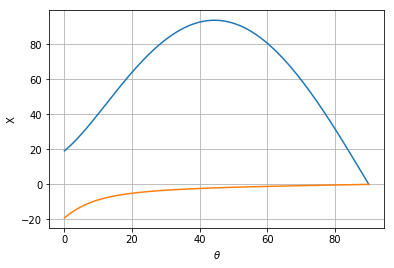

In [6]:
theta = np.linspace(0,90,5000)*(np.pi/180) # vector de theta en radianes
v_ = 30 #velocidad inicial
h = 2 # altura inicial
k = 2*(v_)**2/g 
x_ = (1/2)*np.cos(theta)*((((k)**0.5)*(4*h+k*(np.sin(theta))**2)**0.5)+k*np.sin(theta))
x_1 = (1/2)*np.cos(theta)*(-(((k)**0.5)*(4*h+k*(np.sin(theta))**2)**0.5)+k*np.sin(theta))
argu_x = np.argmax(x_) #argumento del elemento máximo en x
print('Altura Inicial = ', h)
print('v inicial = ', v_)
print('Angulo para Xmax = ', theta[argu_x]*180/np.pi)
plt.plot(theta*180/np.pi,x_)
plt.plot(theta*180/np.pi,x_1)
plt.ylabel('X')
plt.xlabel(r'$\theta$')
plt.grid('on')

La solución $x_{1}$ no tiene sentído físico según el marco de referencia escogido entonces se desprecia. Se procede a realizar el cálculo de la dependencia de la velocidad para el ángulo para la distancia max

SYMPY ofrece la solución a las derivadas simbolicas de forma rápida

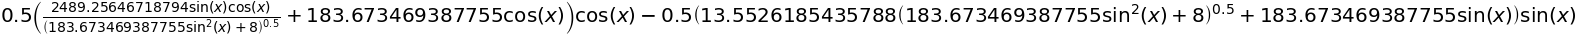

In [7]:
from sympy import *
x = symbols('x') #se declara x como la variable simbolica
init_printing(use_unicode=True) 
#imprime en pantalla el resultado
1/2*diff(cos(x)*(((k**0.5)*(4*h+k*(sin(x))**2)**0.5)+k*sin(x)), x)

Para los perezosos, sería mejor usa wolfram jaja :

Wolfram brinda lo siguiente (verificarlo por su cuenta):
En este caso Dist = x, y la variable independiente es x (theta)
$\frac{d Dist}{d x} = cos^2(x) ((0.5 k^{1.5} sin(x))/(4 h + k sin^2(x))^{0.5} + 0.5 k) + sin(x) (-0.5 (k (4 h + k sin^2(x)))^{0.5} - 0.5 k sin(x))$

La derivada en 0, resulta que la función se máximiza en:El máximo de esta función se da para :
$\theta= cos^{-1}\left(\frac{\sqrt{(4 h + k)}}{\sqrt{(2)} \sqrt{(2 h + k)}}\right)$


In [8]:
cos_theta_max = (((4*h+k)**0.5)/(((2)**0.5)*(2*h+k)**0.5))
theta_max = np.arccos(cos_theta_max)
print('Altura Inicial = ', h)
print('v inicial = ', v_)
print('Angulo para Xmax(numeric) = ', theta[argu_x]*180/np.pi)
print('Angulo de Xmax(analitico) = ',(theta_max*180/np.pi))

Altura Inicial =  2
v inicial =  30
Angulo para Xmax(numeric) =  44.39687937587517
Angulo de Xmax(analitico) =  44.38936367993209


interesante sería ver si en algún punto se puede asegurar un ángulo para xmax independiente de la posicion o la velocidad, entonces:
Cuando $\lim_{k\rightarrow \infty} \frac{\sqrt{4 h + k}}{\sqrt{2} \sqrt{2 h + k}}= \frac{1}{\sqrt{2}} $, $\theta=$45°

con esto se concluye que cuando $k \rightarrow \infty$, $\theta_{max} = 45°$, y cuando $k \rightarrow 0$ se obtiene una caida libre. MODELO "GENERAL" IDEAL DE MOVIMIENTO PARABÓLICO